<a href="https://colab.research.google.com/github/niskaa-su/uas-penggalian-data/blob/main/UAS_PENGGALIAN_DATA_PERBEDAAN_DATA_ASLI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from scipy.spatial.distance import cityblock

# Load data
iris = pd.read_excel("/content/Iris - Semester 3.xlsx")
data = iris.iloc[:, :4].values

# Set nilai k
k = 3

# Model KMeans dengan Euclidean distance
kmeans_euclidean = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, random_state=42)
labels_euclidean = kmeans_euclidean.fit_predict(data)

# Model KMeans dengan Manhattan distance
kmeans_manhattan = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, random_state=42, algorithm='full')
labels_manhattan = kmeans_manhattan.fit_predict(data)

# Perbandingan hasil clustering
print("Hasil Clustering dengan Euclidean Distance:")
print(labels_euclidean)
print("Hasil Clustering dengan Manhattan Distance:")
print(labels_manhattan)

Hasil Clustering dengan Euclidean Distance:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Hasil Clustering dengan Manhattan Distance:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


In [3]:
print("Analisis Hasil Clustering:")
for i in range(k):
    centroid_euclidean = kmeans_euclidean.cluster_centers_[i]
    centroid_manhattan = kmeans_manhattan.cluster_centers_[i]

    distance_diff = euclidean(centroid_euclidean, centroid_manhattan)
    print(f"Perbedaan Jarak Pusat Klaster {i + 1} antara Euclidean dan Manhattan: {distance_diff}")

Analisis Hasil Clustering:
Perbedaan Jarak Pusat Klaster 1 antara Euclidean dan Manhattan: 0.0
Perbedaan Jarak Pusat Klaster 2 antara Euclidean dan Manhattan: 0.0
Perbedaan Jarak Pusat Klaster 3 antara Euclidean dan Manhattan: 0.0


In [4]:
import pandas as pd

# Hasil clustering dengan Euclidean distance
euclidean_results = pd.DataFrame({'Euclidean_Cluster_Labels': labels_euclidean})

# Hasil clustering dengan Manhattan distance
manhattan_results = pd.DataFrame({'Manhattan_Cluster_Labels': labels_manhattan})

# Menggabungkan hasil clustering menjadi satu DataFrame
combined_results = pd.concat([iris, euclidean_results, manhattan_results], axis=1)

# Menyimpan hasil perbedaan clustering ke dalam file Excel
output_file = "perbedaan_clustering.xlsx"
combined_results.to_excel(output_file, index=False)

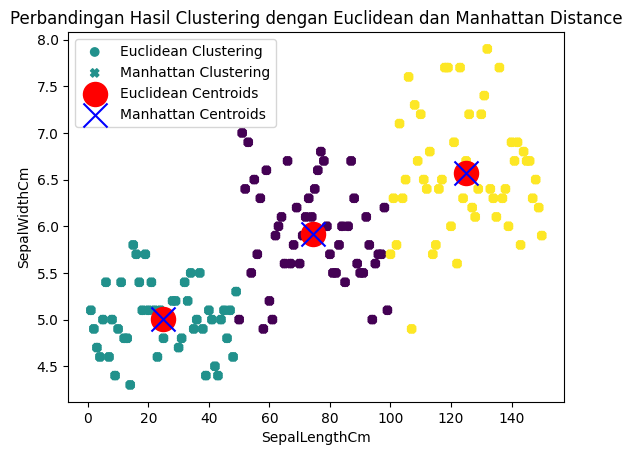

In [7]:
import matplotlib.pyplot as plt

# ... (kode sebelumnya)

# Visualisasi hasil clustering
plt.scatter(data[:, 0], data[:, 1], c=labels_euclidean, cmap='viridis', label='Euclidean Clustering')
plt.scatter(data[:, 0], data[:, 1], c=labels_manhattan, cmap='viridis', marker='X', label='Manhattan Clustering')
plt.scatter(kmeans_euclidean.cluster_centers_[:, 0], kmeans_euclidean.cluster_centers_[:, 1], s=300, c='red', marker='o', label='Euclidean Centroids')
plt.scatter(kmeans_manhattan.cluster_centers_[:, 0], kmeans_manhattan.cluster_centers_[:, 1], s=300, c='blue', marker='x', label='Manhattan Centroids')
plt.title('Perbandingan Hasil Clustering dengan Euclidean dan Manhattan Distance')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()
plt.show()